OASIS INFOBYTE INTERNSHIP 

LEVEL-1:- TASK 3

Project Name - Cleaning Data

Intern - Swathi Bonagiri

Domain - Data Analytics


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("C:/Users/swath/Downloads/Cleaning_Data-3/AB_NYC_2019.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape              
df.info()             
df.describe()         
df.columns            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

df.dropna(subset=['name', 'host_name'], inplace=True)


In [ ]:
df.duplicated().sum()

df.drop_duplicates(inplace=True)

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df['last_review'] = pd.to_datetime(df['last_review'])

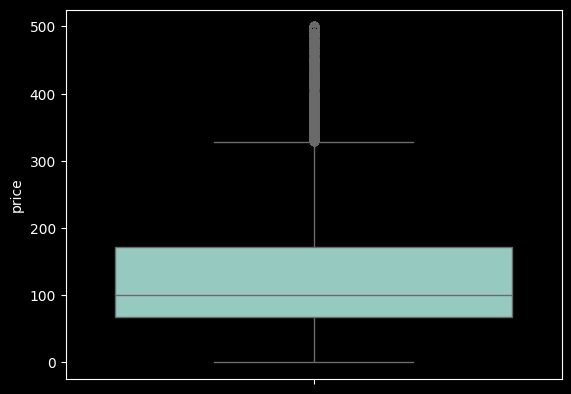

In [22]:
plt.style.use("dark_background")
sns.boxplot(df['price'])
plt.show()

In [10]:
df = df[df['price'] <= 500]

In [11]:
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 47814 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              47814 non-null  int64         
 1   name                            47814 non-null  object        
 2   host_id                         47814 non-null  int64         
 3   host_name                       47814 non-null  object        
 4   neighbourhood_group             47814 non-null  object        
 5   neighbourhood                   47814 non-null  object        
 6   latitude                        47814 non-null  float64       
 7   longitude                       47814 non-null  float64       
 8   room_type                       47814 non-null  object        
 9   price                           47814 non-null  int64         
 10  minimum_nights                  47814 non-null  int64         
 11  number_

0

In [12]:
df.to_csv('Cleaned_AB_NYC_2019.csv', index=False)

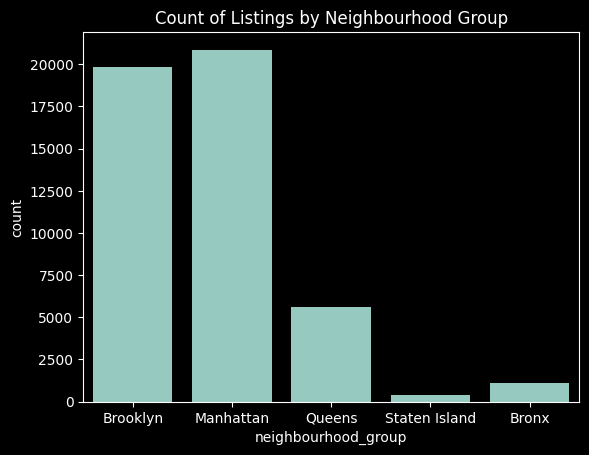

In [18]:
plt.style.use("dark_background")
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Count of Listings by Neighbourhood Group')
plt.show()

numeric_df = df.select_dtypes(include=['int64', 'float64'])

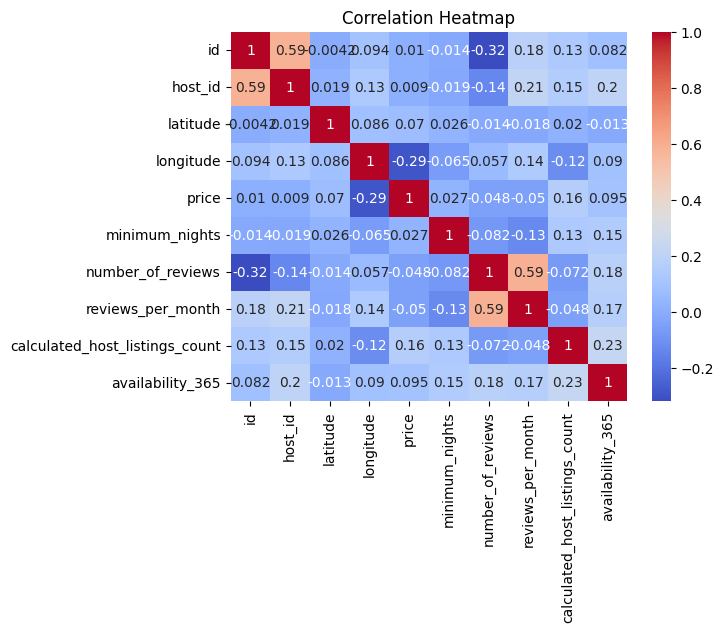

In [16]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()